In [1]:
from tensor import *
from keras.datasets import mnist
import keras
import numpy as np

2023-05-24 19:08:11.140585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 19:08:11.184852: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 19:08:11.185777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 19:08:12.116130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train_images = np.asarray(x_train, dtype=np.float32) / 255.0
test_images = np.asarray(x_test, dtype=np.float32) / 255.0
train_images = train_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)
y_train = keras.utils.to_categorical(y_train)

In [3]:
def calculate_loss(X,Y,W):
  
  return -(1/X.shape[0])*np.sum(np.sum(Y*np.log(np.exp(np.matmul(X,W)) / np.sum(np.exp(np.matmul(X,W)),axis=1)[:, None]),axis = 1))

In [4]:
from module import *

In [23]:

model = Sequential(Linear(784, 20),ReLU(),Linear(20,10))
optimizer = SGD(model.parameters(), lr = 1, momentum= 0.1)

KeyboardInterrupt: 

In [ ]:
model.layers

(Linear(784, 20), <module.ReLU at 0x7fa32cb89b10>, Linear(20, 10))

In [ ]:
np.isnan(model.layers[0].weight.data).any()

False

In [ ]:
# model.parameters()

In [ ]:
batch_size = 32
ri = np.random.permutation(train_images.shape[0])[:batch_size]
Xb, yb = Tensor(train_images[ri]), Tensor(y_train[ri])
y_predW = model(Xb)

In [ ]:
y_predW.data.shape

(32, 10)

In [ ]:
y_predW[0]

Tensor([-0.00688925  0.0142958  -0.00536965 -0.01719329  0.00505339 -0.01455789
  0.02415609 -0.0122791   0.02165094 -0.01416841]) grad = 0.0

In [ ]:
y_predW[1]

NameError: name 'y_predW' is not defined

In [ ]:
yb[0]

NameError: name 'yb' is not defined

In [ ]:
np.argmax(yb[0].data)

9

In [ ]:
np.argmax(yb.data,axis=1)

array([9, 0, 8, 8, 0, 1, 3, 4, 3, 5, 9, 2, 0, 6, 7, 4, 1, 2, 7, 1, 8, 4,
       2, 7, 1, 1, 2, 2, 1, 2, 2, 8])

In [ ]:
batch_size = 32
ri = np.random.permutation(train_images.shape[0])[:batch_size]
Xb, yb = Tensor(train_images[ri]), Tensor(y_train[ri])
y_predW = model(Xb)
np.argmax(y_predW.data,axis=1)

linear output (32, 20) argmax [ 4 17 19 14 17  4 17 17 17 17 14 17  4 16 19  1 16 16  2  4 17  4  4 16
 19  4 17  4 16  2  2  4]
ReLU output (32, 20) argmax [ 4 17 19 14 17  4 17 17 17 17 14 17  4 16 19  1 16 16  2  4 17  4  4 16
 19  4 17  4 16  2  2  4]
linear output (32, 10) argmax [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [ ]:
y_predW[0]

Tensor([-0.01880147 -0.00016397  0.02096353 -0.00248219  0.02115589  0.01418663
  0.02148349  0.01876744 -0.0192274  -0.01711052]) grad = 0.0

In [ ]:
y_predW[1]

Tensor([-1.89766167e-02  6.90016127e-05  2.08070520e-02 -2.55205703e-03
  2.09861621e-02  1.40790633e-02  2.13097845e-02  1.83738480e-02
 -1.93391507e-02 -1.70197048e-02]) grad = 0.0

In [ ]:

model = Sequential(Linear(784, 20),ReLU(),Linear(20,10))
optimizer = SGD(model.parameters(), lr = 1, momentum= 0.1)

In [ ]:
batch_size = 32
steps = 20
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri]), Tensor(y_train[ri])
  # print(f'{np.isnan(Xb.grad).any()}')
  # y_predW = Xb @ Wb
  y_predW = model(Xb)
  print(f'pred {np.argmax(y_predW.data,axis=1)}')
  # visualizer.visualize(y_predW,rankdir=rankdir)
  # print(f'pred shape {y_predW.data.shape}')
  probs = y_predW.softmax()
  # print(f'probs shape {probs.data.shape}')
  log_probs = probs.log()

  zb = yb*log_probs

  outb = zb.sum(axis = 1)
  print(f'*out shape {outb.shape} zb shape {zb.shape} log_probs shape {log_probs.shape}')
  finb = -outb.sum()  #cross entropy loss
  # print(f'*** {np.isnan(model.layers[0].weight.data).any()}')
  # print(f'finb shape {finb.shape} finb {finb}')
  finb.backward()
  # print(f'{np.isnan(Xb.grad).any()}')

  if step%1000==0:
    loss = calculate_loss(train_images,y_train,Wb.data)
    print(f'loss in step {step} is {loss}')
  optimizer.step()
  # for p in model.parameters():
  #   # print(f'p shape {p.shape} {p.grad.shape}')
  #   print(f'{np.isnan(p.data).any()}')
  #   p.data = p.data - 1*p.grad
  #   print(f'{np.isnan(p.data).any()}')
  #   p.grad = np.zeros_like(p.grad)
    # optimizer.zero_grad()
  # Wb.data = Wb.data- 0.01*Wb.grad
  # Wb.grad = 0
loss = calculate_loss(train_images,y_train,Wb.data)
print(f'loss in final step {step+1} is {loss}')

pred [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
loss in step 0 is 15.40182785417537
pred [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
*out shape (32,) zb shape (32, 10) log_probs shape (32, 10)
pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/home/jrdfm/fun/autograd/tensor.py:168: RuntimeWarning: divide by zero encountered in log
  out = Tensor(np.log(self.data), (self,), 'log')
/home/jrdfm/fun/autograd/tensor.py:57: RuntimeWarning: invalid value encountered in multiply
  out = Tensor(self.data * other.data, (self, other), '*')
/home/jrdfm/fun/autograd/tensor.py:170: RuntimeWarning: invalid value encountered in divide
  self.grad += out.grad / self.data


loss in final step 20 is 15.40182785417537


In [5]:

model = Sequential(Linear(784, 20),ReLU(),Linear(20,10))	
optimizer = SGD(model.parameters(), lr = 0.01, momentum= 0.1)

In [6]:
import numpy as np

def compute_loss(outputs, labels):
	# Avoid numerical instability by adding a small epsilon value
	epsilon = 1e-10
	batch_size = labels
	# Calculate the cross-entropy loss
	loss = -np.sum(labels * np.log(outputs + epsilon)) / batch_size

	return loss



def compute_loss(outputs, labels):
    # Avoid numerical instability by adding a small epsilon value
    epsilon = 1e-10

    # Apply softmax to convert logits into probabilities
    softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)

    # Calculate the cross-entropy loss
    loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]

    return loss


def accuracy(outputs, labels):
	acc = np.sum(np.argmax(outputs.data,axis=1) == np.argmax(labels.data,axis=1))/batch_size

	return acc

In [7]:
batch_size = 32
steps = 2000
Wb = Tensor(np.random.randn(784,10))# new initialized weights for gradient descent
l,a = 0, 0
for step in range(steps):
  
  optimizer.zero_grad()
  ri = np.random.permutation(train_images.shape[0])[:batch_size]
  Xb, yb = Tensor(train_images[ri]), Tensor(y_train[ri])
  # print(f'{np.isnan(Xb.grad).any()}')
  # y_predW = Xb @ Wb
  y_predW = model(Xb)
  # print(f'pred {np.argmax(y_predW.data,axis=1)}')
  # visualizer.visualize(y_predW,rankdir=rankdir)
  # print(f'pred shape {y_predW.data.shape}')
  probs = y_predW.softmax()
  # print(f'probs shape {probs.data.shape}')
  log_probs = probs.log()

  zb = yb*log_probs

  outb = zb.sum(axis = 1)
  # print(f'*out shape {outb.shape} zb shape {zb.shape} log_probs shape {log_probs.shape}')
  finb = -outb.sum()  #cross entropy loss
  # print(f'*** {np.isnan(model.layers[0].weight.data).any()}')
  # print(f'finb shape {finb.shape} finb {finb}')
  finb.backward()
  # print(f'{np.isnan(Xb.grad).any()}')
  # loss = calculate_loss(train_images,y_train,model.layers[0].weight.data.T)
  # l += loss
  a += accuracy(y_predW,yb)
  l += compute_loss(y_predW.data,yb.data)
  # print(f'step {step} loss {loss} acc {acc}')
  if step%100==0:
    # loss = calculate_loss(train_images,y_train,model.layers[2].weight.data)
    # print(f'loss in step {step} is {loss}')
    print(f'step {step} loss {l/100} acc {a/100}')
    l,a = 0,0
    # l = 0
  optimizer.step()
  # for p in model.parameters():
  #   # print(f'p shape {p.shape} {p.grad.shape}')
  #   # print(f'{np.isnan(p.data).any()}')
  #   p.data = p.data - 0.01*p.grad
    # print(f'{np.isnan(p.data).any()}')
    # p.grad *= 0
    # p.grad = np.zeros_like(p.grad)
    # optimizer.zero_grad()
  # model.layers[0].weight.data = model.layers[0].weight.data- 0.01*model.layers[0].weight.grad
  # model.layers[0].weight.grad = 0
  # print(f'{Wb.data.shape} {model.layers[0].weight.data.shape}')
# loss = calculate_loss(train_images,y_train,model.layers[2].weight.data)
# print(f'loss in final step {step+1} is {loss}')

step 0 loss 0.023002610775303342 acc 0.000625
step 100 loss 1.224178477070452 acc 0.5821875
step 200 loss 0.5243154572200724 acc 0.8353125
step 300 loss 0.4417091954362667 acc 0.864375
step 400 loss 0.37324085847560484 acc 0.8928125
step 500 loss 0.37232352782585193 acc 0.8878125
step 600 loss 0.33631218909764476 acc 0.8940625
step 700 loss 0.3397087521999247 acc 0.898125
step 800 loss 0.2999611150572314 acc 0.91
step 900 loss 0.3418884758589936 acc 0.8965625
step 1000 loss 0.3119543063285391 acc 0.909375
step 1100 loss 0.29035929532145954 acc 0.910625
step 1200 loss 0.2857520893898183 acc 0.914375
step 1300 loss 0.28194281933175236 acc 0.92375
step 1400 loss 0.2540342100604297 acc 0.9159375
step 1500 loss 0.25003906090909267 acc 0.9275
step 1600 loss 0.2572551354491911 acc 0.9253125
step 1700 loss 0.25846338049208006 acc 0.9275
step 1800 loss 0.23521909555775178 acc 0.9325
step 1900 loss 0.2521188448215592 acc 0.930625


In [61]:
epsilon = 1e-10
labels = yb.data
outputs = y_predW.data
softmax_outputs = np.exp(outputs) / np.sum(np.exp(outputs), axis=1, keepdims=True)
# Calculate the cross-entropy loss
loss = -np.sum(labels * np.log(softmax_outputs + epsilon)) / outputs.shape[0]
loss

0.35251004215751597

In [71]:
print(f'pred {np.argmax(y_predW.data,axis=1)} yb {np.argmax(yb.data,axis=1)}')

pred [8 4 0 4 0 1 4 0 6 2 3 3 0 4 7 8 9 0 3 3 7 9 2 7 8 3 8 4 2 1 0 7] yb [8 4 0 4 0 1 4 0 6 2 3 3 0 4 7 8 9 0 3 3 7 9 2 7 8 3 8 4 2 1 0 7]


In [72]:
np.argmax(y_predW.data,axis=1) == np.argmax(yb.data,axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [53]:
np.sum(np.argmax(y_predW.data,axis=1) == np.argmax(yb.data,axis=1))/batch_size

0.875

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy on test data is {accuracy_score(np.argmax(np.matmul(test_images,Wb.data),axis = 1),y_test)*100} %')

accuracy on test data is 6.23 %


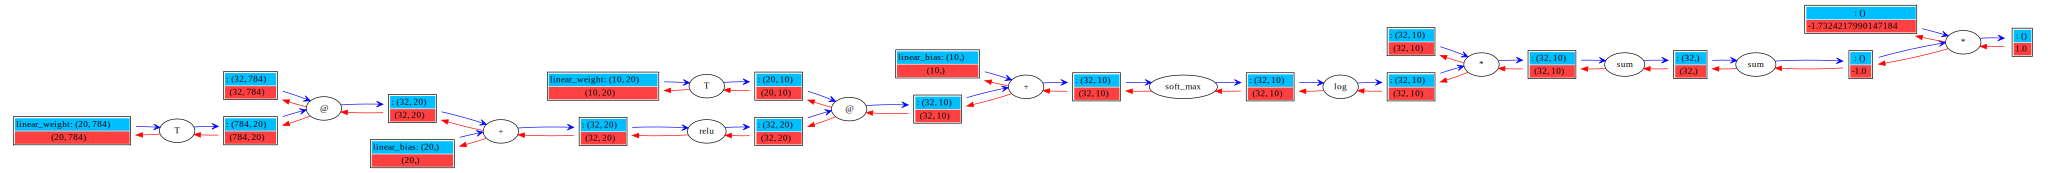

In [73]:
visualizer = ForwardGraphVisualizer()
rankdir = "LR"
# visualizer.visualize( model(Xb),rankdir=rankdir)
visualizer.visualize(finb,rankdir=rankdir)

In [ ]:
xs = Tensor([
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],])
ys = Tensor([1.0, -1.0, -1.0, 1.0]) # desired targets
xs,ys

(Tensor([[ 2.   3.  -1. ]
  [ 3.  -1.   0.5]
  [ 0.5  1.   1. ]
  [ 1.   1.  -1. ]]) :  : 0.0,
 Tensor([ 1. -1. -1.  1.]) :  : 0.0)

In [ ]:
model = Sequential(Linear(3,4),Tanh(),Linear(4,4),Tanh(),Linear(4,1))
model.parameters()

BIAS 0.0
BIAS 0.0
BIAS 0.0


[Tensor([[ 0.09410854 -0.00917345  0.09061815]
  [ 0.15935506  0.13707903  0.12097193]
  [ 0.08800163  0.14390824 -0.137771  ]
  [ 0.08815499 -0.06195678 -0.16482807]]) :  : 0.0,
 Tensor([ 0.09899731 -0.06089928  0.01410803 -0.04415918]) :  : 0.0,
 Tensor([[-0.0355543   0.10814913 -0.06551994  0.11599625]
  [-0.11742057  0.0422681  -0.09377762 -0.02993156]
  [ 0.11958172 -0.02269442  0.03188701 -0.11193053]
  [-0.12170986  0.04962903  0.06264825 -0.10954422]]) :  : 0.0,
 Tensor([-0.00366607 -0.08050901  0.01645592 -0.09695664]) :  : 0.0,
 Tensor([[ 0.02237078 -0.10812013 -0.1191539   0.01954646]]) :  : 0.0,
 Tensor([-0.08864619]) :  : 0.0]

In [ ]:
model(xs).shape

__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([ 0.09899731 -0.06089928  0.01410803 -0.04415918]) :  : 0.0
bias Tensor([ 0.09899731 -0.06089928  0.01410803 -0.04415918]) :  : 0.0
output shape (4, 4) grad 0.0 bias grad 0.0
__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.00366607 -0.08050901  0.01645592 -0.09695664]) :  : 0.0
bias Tensor([-0.00366607 -0.08050901  0.01645592 -0.09695664]) :  : 0.0
output shape (4, 4) grad 0.0 bias grad 0.0
__add__ self (4, 1) other linear_bias (1,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.08864619]) :  : 0.0
bias Tensor([-0.08864619]) :  : 0.0
output shape (4, 1) grad 0.0 bias grad 0.0


(4, 1)

In [ ]:
ys.reshape((4,1)).shape

(4, 1)

In [ ]:

for k in range(30):
  
  # forward pass
  ypred = model(xs) # 4x1
  # print(f'type {type(ypred)}')
  # loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  loss = ((ys.reshape((4,1)) - ypred)**2).sum()
  # backward pass
  for p in model.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in model.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([ 0.09899731 -0.06089928  0.01410803 -0.04415918]) :  : 0.0
bias Tensor([ 0.09899731 -0.06089928  0.01410803 -0.04415918]) :  : 0.0
output shape (4, 4) grad 0.0 bias grad 0.0
__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.00366607 -0.08050901  0.01645592 -0.09695664]) :  : 0.0
bias Tensor([-0.00366607 -0.08050901  0.01645592 -0.09695664]) :  : 0.0
output shape (4, 4) grad 0.0 bias grad 0.0
__add__ self (4, 1) other linear_bias (1,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.08864619]) :  : 0.0
bias Tensor([-0.08864619]) :  : 0.0
output shape (4, 1) grad 0.0 bias grad 0.0
__add__ self (4, 1) other  (4, 1) type <class 'tensor.Tensor'>
__add__ other Tensor([[0.07821881]
 [0.08161305]
 [0.08794855]
 [0.07949511]]) : * : 0.0
__add__ _backward self 0.0 other 0.0 
__add__ _backward self 0.0 other 0.0 
__add__ _backward self 0.0 other 0.0 
__

In [ ]:
((ys.reshape((4,1)) - ypred)**2).sum()

__add__ self (4, 1) other  (4, 1) type <class 'tensor.Tensor'>
__add__ other Tensor([[-1.05654806]
 [ 1.0076911 ]
 [ 1.01546906]
 [-0.92013546]]) : * : 0.0


Tensor(0.00987447173758748) : sum : 0.0

In [ ]:
ypred

Tensor([[ 1.05654806]
 [-1.0076911 ]
 [-1.01546906]
 [ 0.92013546]]) : + : [[ 0.11309612]
 [-0.0153822 ]
 [-0.03093812]
 [-0.15972907]]

__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([ 0.07569376 -0.063348   -0.05936519 -0.06325634]) :  : [ 0.03254644  0.00465712 -0.04857179 -0.04068124]
bias Tensor([ 0.07569376 -0.063348   -0.05936519 -0.06325634]) :  : [ 0.03254644  0.00465712 -0.04857179 -0.04068124]
output shape (4, 4) grad 0.0 bias grad [ 0.03254644  0.00465712 -0.04857179 -0.04068124]
__add__ self (4, 4) other linear_bias (4,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.00376323 -0.04498393  0.01669929 -0.09256875]) :  : [-0.01534965  0.04853076  0.05479262 -0.02358582]
bias Tensor([-0.00376323 -0.04498393  0.01669929 -0.09256875]) :  : [-0.01534965  0.04853076  0.05479262 -0.02358582]
output shape (4, 4) grad 0.0 bias grad [-0.01534965  0.04853076  0.05479262 -0.02358582]
__add__ self (4, 1) other linear_bias (1,) type <class 'tensor.Tensor'>
__add__ other Tensor([-0.06164887]) :  : [-0.09295327]
bias Tensor([-0.06164887]) :  : [-0.09295327]
output shape (4

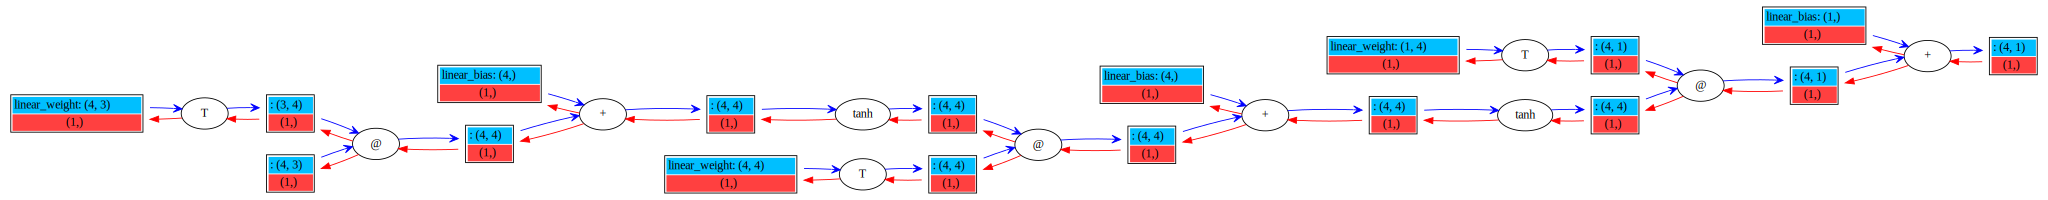

In [ ]:
visualizer = ForwardGraphVisualizer()
rankdir = "LR"
visualizer.visualize( model(xs),rankdir=rankdir)